In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz

import graphviz
import pandas as pd
from sklearn import tree

# Classifier model

In [81]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(max_depth=4, random_state=1234)

## Initialize dtreeviz model

In [82]:
viz_model = dtreeviz.model(tree_classifier, x_data=dataset[features], y_data=dataset[target], feature_names=features, 
               target_name=target, class_names=[0, 1])

## Tree visualizations

### Tree structure

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


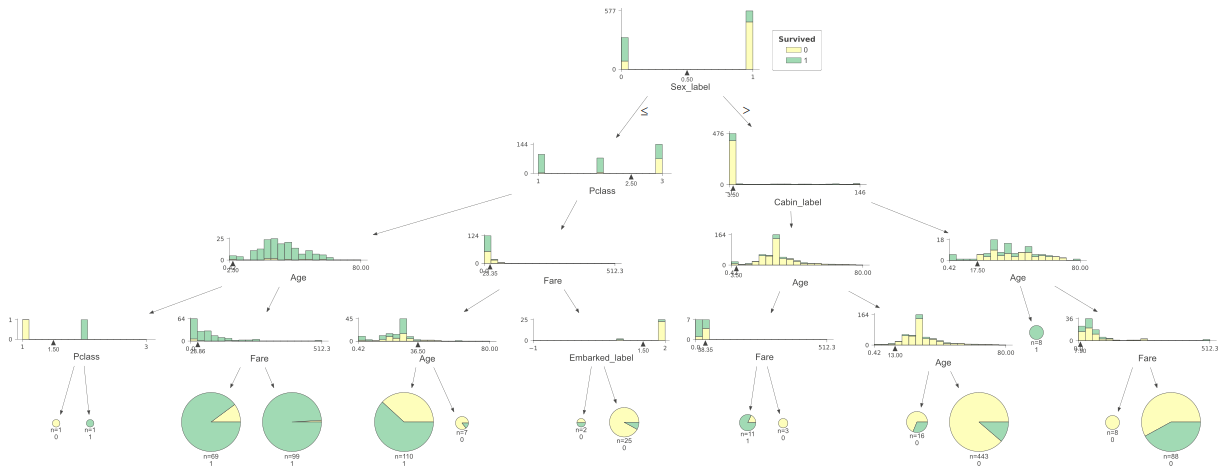

In [83]:
viz_model.view()

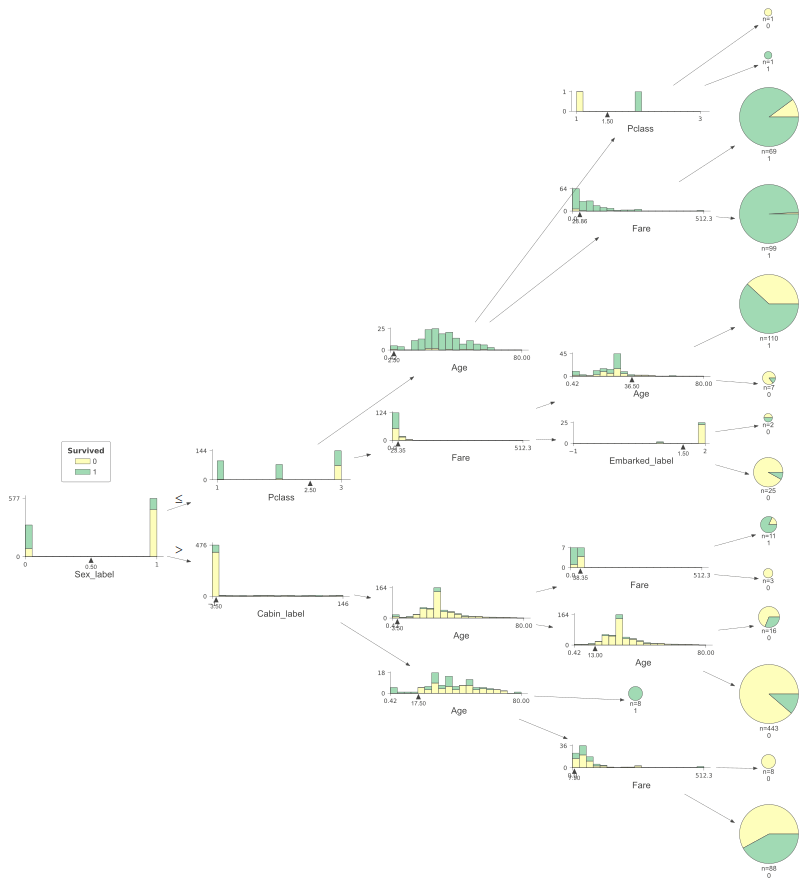

In [84]:
# different tree orientation
viz_model.view(orientation="LR")

### Tree structure simplified

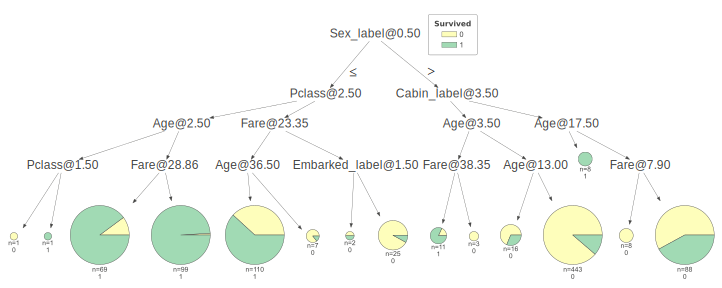

In [85]:
viz_model.view(fancy=False)

### Tree structure levels filtering

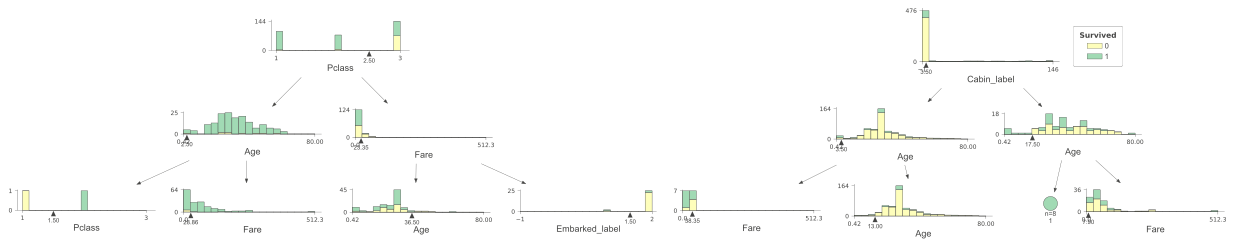

In [86]:
viz_model.view(depth_range_to_display=(1, 3))

## Prediction path explanations

In [87]:
X = dataset[features].iloc[10]
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

### Path inside tree structure

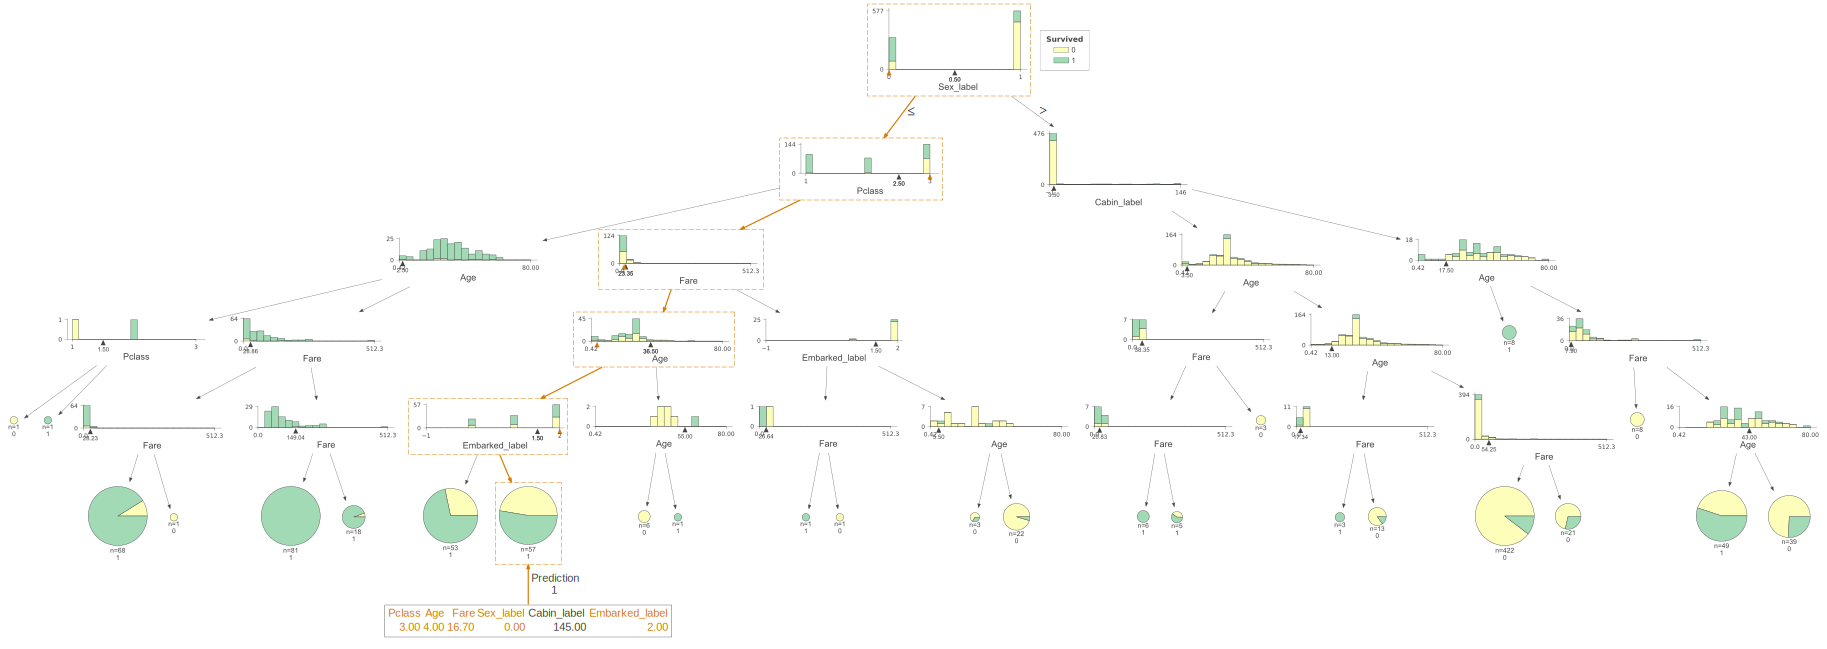

In [88]:
dtv_model.view(X=X)

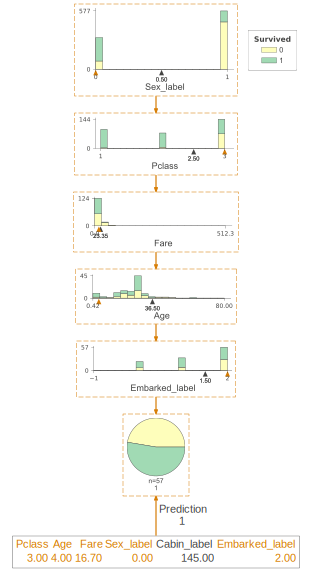

In [89]:
dtv_model.view(X=X, show_just_path=True)

### Prediction features range values

In [90]:
print(viz_model.explain_prediction_path(X))

2.5 <= Pclass 
Age < 36.5
Fare < 23.35
Sex_label < 0.5



### Prediction features importance

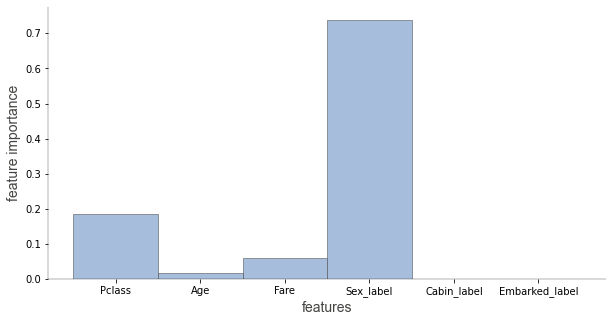

In [91]:
viz_model.instance_feature_importance(X)

## Leaf info

### Leaf sizes

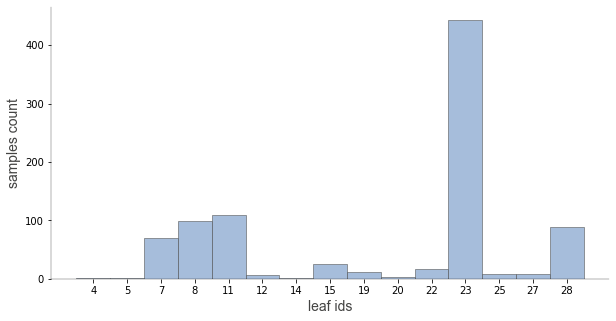

In [92]:
viz_model.leaf_sizes()

### Leaf classes distributions

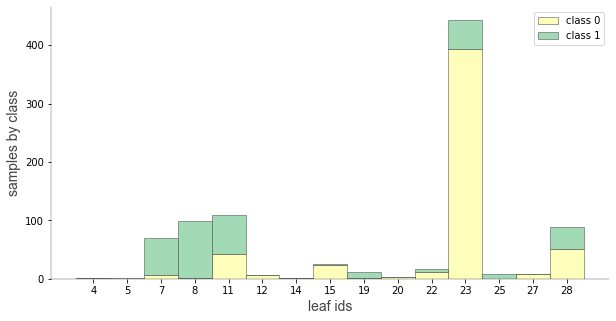

In [93]:
viz_model.ctree_leaf_distributions()

### Leaf/node stats

In [94]:
viz_model.node_stats(node_id=23)

Pclass         Age        Fare  Sex_label  Cabin_label  \
count  443.000000  443.000000  443.000000      443.0   443.000000   
mean     2.647856   30.564784   15.596611        1.0    -0.984199   
std      0.603657   10.211260   18.798236        0.0     0.217396   
min      1.000000   14.000000    0.000000        1.0    -1.000000   
25%      2.000000   24.000000    7.775000        1.0    -1.000000   
50%      3.000000   29.699118    8.050000        1.0    -1.000000   
75%      3.000000   33.000000   15.245800        1.0    -1.000000   
max      3.000000   74.000000  227.525000        1.0     3.000000   

       Embarked_label  
count      443.000000  
mean         1.650113  
std          0.706735  
min          0.000000  
25%          2.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

### Leaf purities

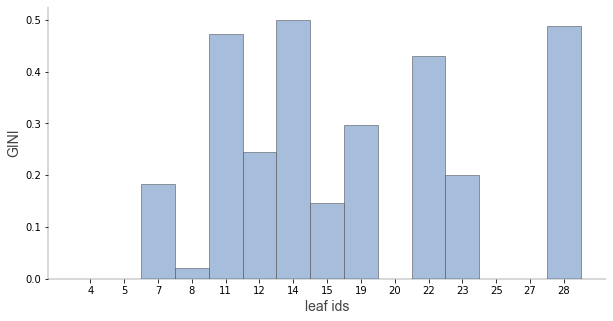

In [95]:
viz_model.leaf_purity()

# Regressor model

In [96]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.


DecisionTreeRegressor(criterion='mae', max_depth=4, random_state=1234)

## Initialize dtreeviz model

In [97]:
viz_rmodel = dtreeviz.model( model=tree_regressor, 
                        x_data=dataset[features_reg], 
                        y_data=dataset[target_reg], 
                        feature_names=features_reg, 
                        target_name=target_reg)

## Tree visualisations

### Tree structure

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


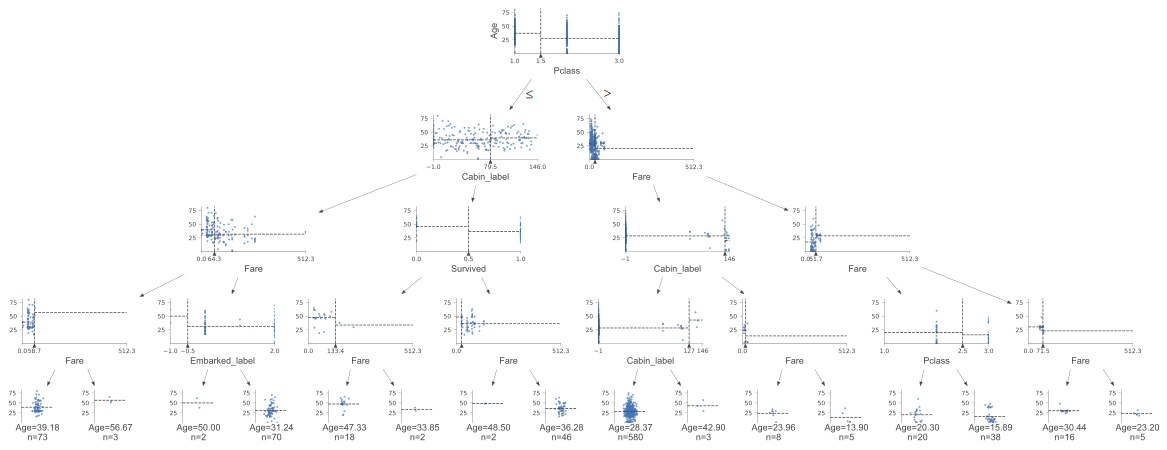

In [98]:
viz_rmodel.view()

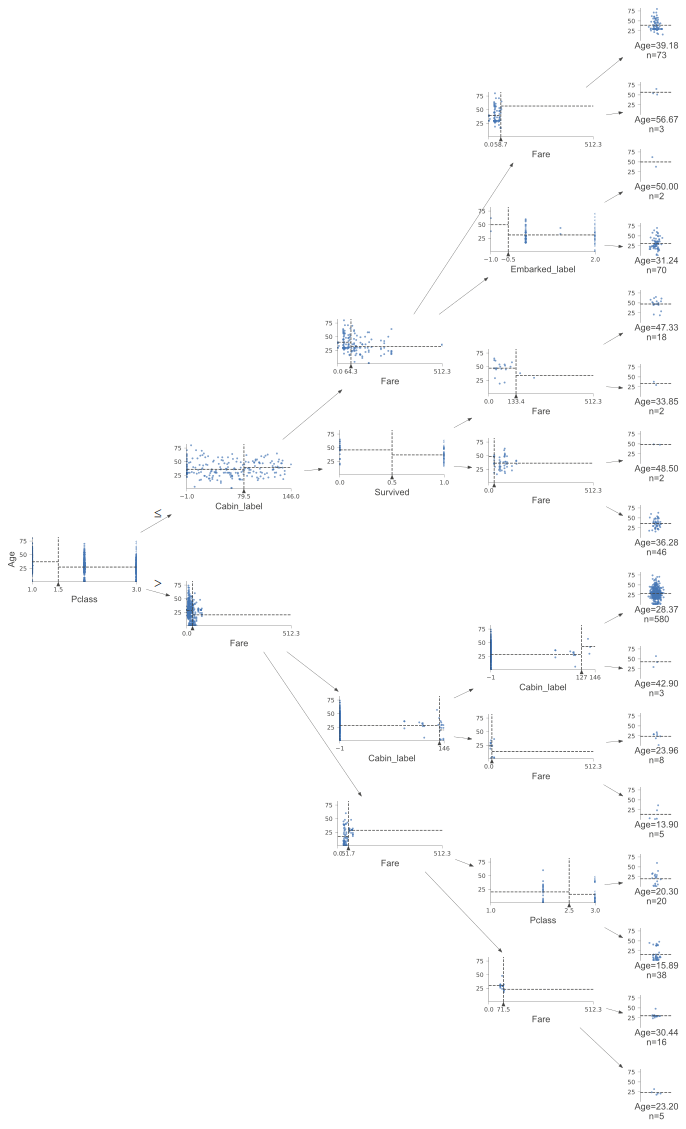

In [99]:
# different tree orientation
viz_rmodel.view(orientation="LR")

### Tree structure simplified

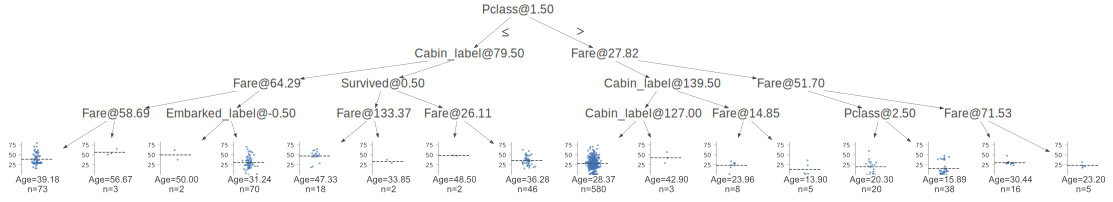

In [100]:
viz_rmodel.view(fancy=False)

### Tree structure levels filtering

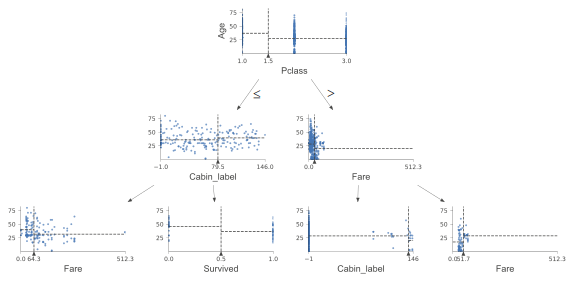

In [102]:
viz_rmodel.view(depth_range_to_display=(0, 2))

#### show just path

In [29]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

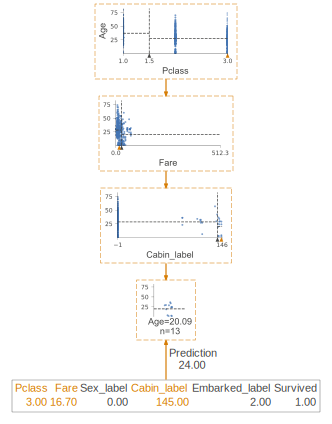

In [30]:
viz_rmodel.view(show_just_path=True, X = x)

### viz_leaf_samples

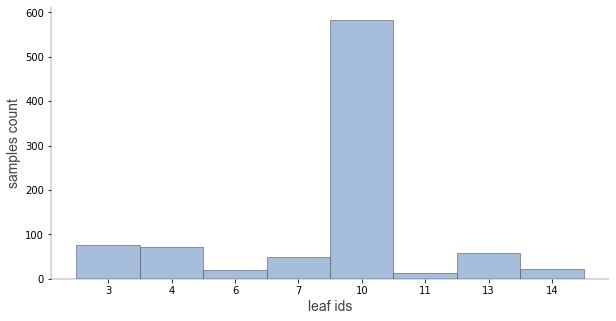

In [31]:
viz_rmodel.leaf_sizes()

### viz_leaf_criterion

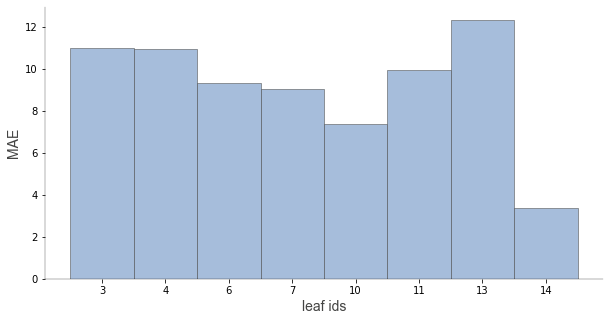

In [32]:
viz_rmodel.leaf_purity()

### viz_leaf_target

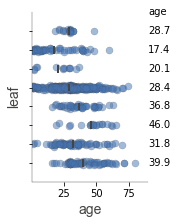

In [33]:
viz_rmodel.rtree_leaf_distributions()

### describe_node_sample

In [34]:
viz_rmodel.node_stats(node_id=1)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   84.154687    0.564815    54.773148        1.175926    0.629630
std       0.0   78.380373    0.496933    43.781906        0.996073    0.484026
min       1.0    0.000000    0.000000    -1.000000       -1.000000    0.000000
25%       1.0   30.923950    0.000000    13.750000        0.000000    0.000000
50%       1.0   60.287500    1.000000    53.500000        2.000000    1.000000
75%       1.0   93.500000    1.000000    91.250000        2.000000    1.000000
max       1.0  512.329200    1.000000   146.000000        2.000000    1.000000

### explain_prediction_path

In [35]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [36]:
print(viz_rmodel.explain_prediction_path(X_reg))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 



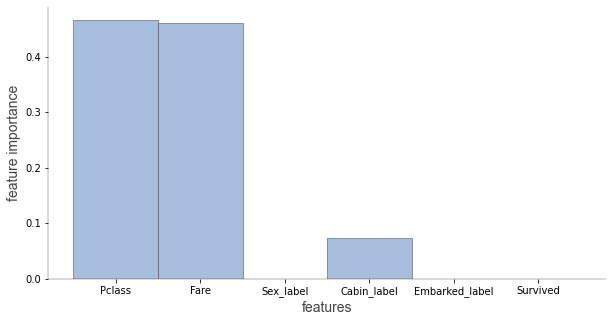

In [37]:
viz_rmodel.instance_feature_importance(X_reg)

### rtreeviz_univar

In [38]:
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

In [39]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="absolute_error")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      random_state=1234)

In [40]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


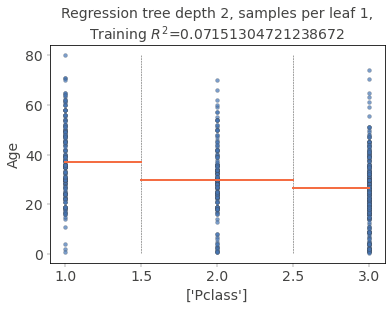

In [41]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [42]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [43]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


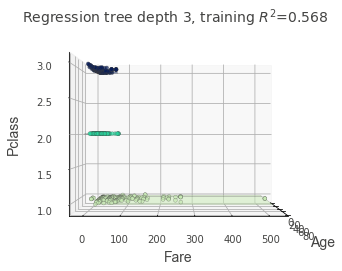

In [44]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [45]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [46]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


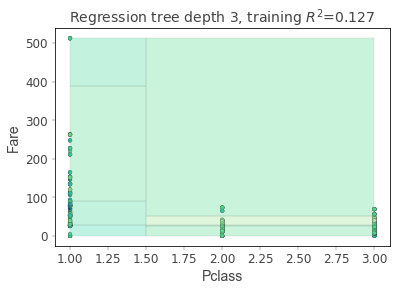

In [47]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)